In [1]:
import pandas as pd
df = pd.read_csv("./fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [2]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(['fetal_health'], axis = 1)
Y = df.fetal_health.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
     

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
     

In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
Y_train = enc.fit_transform(Y_train.reshape(-1,1))
Y_test = enc.transform(Y_test.reshape(-1,1))

In [5]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
#Y_train = Y_train.reshape(Y_train.shape[0],Y_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
#Y_test = Y_test.reshape(Y_test.shape[0],Y_test.shape[1],1)

In [6]:
Y_train.shape

(1700, 3)

In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Dropout, Input, MaxPooling1D, Flatten

model = Sequential()
model.add(Input(shape=(21,1)))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=16, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [12]:
model_history = model.fit(X_train, Y_train, epochs=6, batch_size=32, verbose=2, validation_data=(X_test,Y_test))

Epoch 1/6
54/54 - 2s - loss: 0.7418 - accuracy: 0.7600 - val_loss: 0.6336 - val_accuracy: 0.7723 - 2s/epoch - 37ms/step
Epoch 2/6
54/54 - 0s - loss: 0.4992 - accuracy: 0.8182 - val_loss: 0.4710 - val_accuracy: 0.8357 - 170ms/epoch - 3ms/step
Epoch 3/6
54/54 - 0s - loss: 0.4074 - accuracy: 0.8553 - val_loss: 0.3892 - val_accuracy: 0.8521 - 236ms/epoch - 4ms/step
Epoch 4/6
54/54 - 0s - loss: 0.3465 - accuracy: 0.8776 - val_loss: 0.3706 - val_accuracy: 0.8568 - 189ms/epoch - 4ms/step
Epoch 5/6
54/54 - 0s - loss: 0.3238 - accuracy: 0.8747 - val_loss: 0.3278 - val_accuracy: 0.8850 - 238ms/epoch - 4ms/step
Epoch 6/6
54/54 - 0s - loss: 0.3193 - accuracy: 0.8741 - val_loss: 0.3100 - val_accuracy: 0.8897 - 185ms/epoch - 3ms/step


In [9]:
model.evaluate(X_test, Y_test)

14/14 [==============================] - 0s 5ms/step - loss: 0.3050 - accuracy: 0.8826


[0.30496010184288025, 0.8826290965080261]

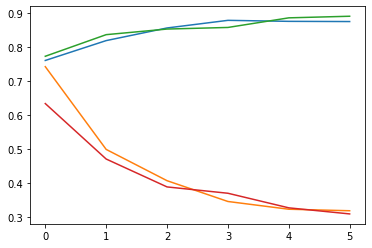

In [13]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_accuracy'])
plt.plot(model_history.history['val_loss'])